In [19]:
import ee
import geemap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [28]:
Map = geemap.Map(center=[36.976,-75.9585], zoom=10)
Map

Map(center=[36.976, -75.9585], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButto…

In [37]:
#this can be used to look at features drawn on the map
Map.draw_features[0]

## First we should grab a number of different filters for our data

The first set of filters will be the actual polygon we wish to filter the data with

In [21]:
#This can be used to make an arbitrary polygon to use
polys = ee.Geometry.Polygon([[[-75.9585,36.976],
                              [-75.9585,35.4514],
                              [-74.7828,35.4514],
                              [-74.7828,36.976]]])
centroid = polys.centroid()
lng, lat = centroid.getInfo()['coordinates']
print("lng = {}, lat = {}".format(lng, lat))
Map.addLayer(polys)



#we can use this to make a rectangle to filter the data with
AOI_poly = ee.Geometry.Rectangle([-75.7450, 36.0601,-75.4950, 35.6996])

lng = -75.37065000000008, lat = 36.21266139995265


We have a number of other filters we can use on our data

In [22]:
sentinel_collection = ee.ImageCollection("COPERNICUS/S2_SR")
sentinel_collection = sentinel_collection.filterBounds(AOI_poly).filterDate('2020-01-01','2020-01-28')



In [14]:
sentinel_collection.size().getInfo()

49

In [7]:
image = sentinel_collection.first()
properties = geemap.image_props(image).getInfo()
properties['CLOUDY_PIXEL_PERCENTAGE']

18.532182

Text(0.5, 1.0, 'cdf for cloud pixel percentage')

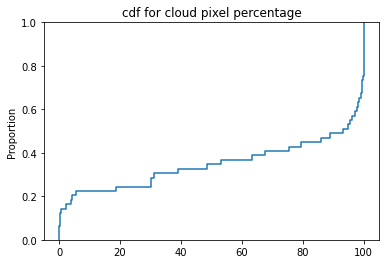

In [15]:
fig, ax = plt.subplots()
sns.ecdfplot(sentinel_collection.aggregate_array('CLOUDY_PIXEL_PERCENTAGE').getInfo(),)
plt.title('cdf for cloud pixel percentage')

In [39]:
sentinel_image = sentinel_collection.filterBounds(AOI_poly).filterDate('2020-01-01','2020-01-28').sort("CLOUD_COVER").first()
Map.addLayer(sentinel_image,name='best image')

In [58]:
#converting to a numpy array
AOI_poly =ee.Geometry.Rectangle([-75.7157, 36.8691 , -75.6707, 36.8372])
rgb_img = geemap.ee_to_numpy(sentinel_image.select(['B4',  'B3', 'B2']),region = AOI_poly)
rgb_img.shape

(358, 405, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


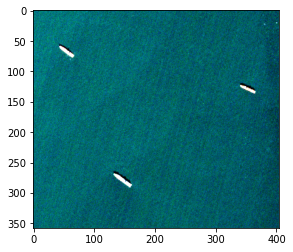

In [59]:
plt.imshow(rgb_img)

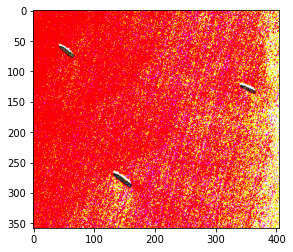

In [60]:
rgb_img_test = (255*((rgb_img[:, :, 0:3] - 100)/3500)).astype('uint8')
plt.imshow(rgb_img_test)
plt.show()

<AxesSubplot:ylabel='Count'>

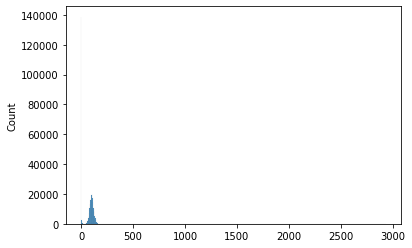

In [61]:
sns.histplot(rgb_img.ravel())

Adding a medium composite of the selcted images

In [8]:
median = sentinel_collection.median()
vis_params = {'bands': ['B4',  'B3', 'B2']}

In [9]:
Map.addLayer(median,vis_params,name='median')

In [ ]:
sentinel_collection.get('index')

In [ ]:
Map.addLayer(image,name='first')

In [14]:
Map.addLayer(sentinel_collection.)

In [25]:
sentinel_collection.toList(sentinel_collection.size().getInfo())

In [16]:
sent_img = sentinel_collection.mosaic()
Map.addLayer(sent_img)